In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
from sklearn.datasets import load_boston
boston = load_boston()

In [6]:
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03


In [7]:
#外れ値除去（３σ）

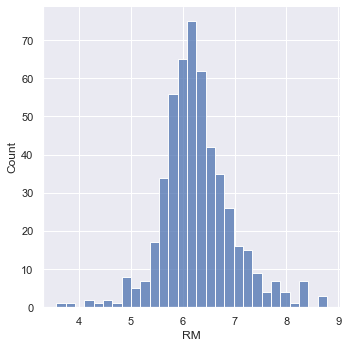

In [11]:
sns.set()
sns.displot(df['RM']);

In [12]:
col = 'RM'

In [13]:
mean = df.mean()

In [14]:
mean[col]

6.284634387351787

In [15]:
sigma = df.mean()

In [16]:
sigma[col]

6.284634387351787

In [19]:
low = mean[col] -3* sigma[col]
low

-12.569268774703573

In [20]:
heigh = mean[col] +3* sigma[col]
heigh

25.138537549407147

In [21]:
df2 = df[(df[col] >= low) & (df[col] <= heigh)]

In [22]:
len(df),len(df2)

(506, 506)

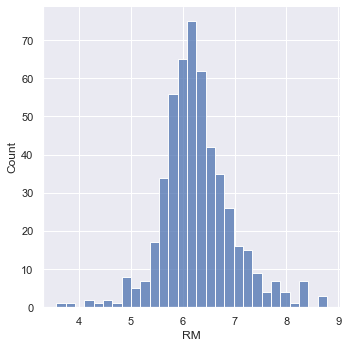

In [23]:
sns.displot(df['RM']);

In [ ]:
# 外れ値除去（全変数）

In [26]:
cols = df.columns
cols

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [28]:
_df = df
for col in cols:
    low = mean[col] -3* sigma[col]
    heigh = mean[col] +3* sigma[col]
    _df = _df[(_df[col] >= low) & (_df[col] <= heigh)]
#     print(col)


In [29]:
len(df)

506

In [30]:
len(_df)

397

In [ ]:
#model building

In [31]:
_df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03


In [32]:
x = _df.drop('LSTAT', axis=1)
t = _df['LSTAT']

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
x_train, x_test, t_train, t_test = train_test_split(x,t,test_size=0.4,random_state=1)

In [37]:
from sklearn.linear_model import LinearRegression

In [39]:
model = LinearRegression().fit(x_train,t_train)

In [40]:
model.score(x_train, t_train)

0.5816357433333912

In [41]:
model.score(x_test, t_test)

0.6278865057609102

In [42]:
df2.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03


In [44]:
from sklearn.preprocessing import StandardScaler

In [46]:
scaler = StandardScaler()

In [47]:
scaler.fit(x_train)

StandardScaler()

In [48]:
x_train2 = scaler.transform(x_train)
x_test2 = scaler.transform(x_test)

In [50]:
model = LinearRegression().fit(x_train2, t_train)

In [51]:
model.score(x_train2, t_train)

0.5816357433333912

In [52]:
model.score(x_test2, t_test)

0.6278865057609095

In [53]:
model.coef_

array([ 1.0885927 ,  0.18086963,  1.05045585,  0.        ,  0.58001773,
       -2.43422391,  2.61436606,  0.93050323, -0.62103094, -0.41671705,
        0.66690481, -0.67370149])

<AxesSubplot:>

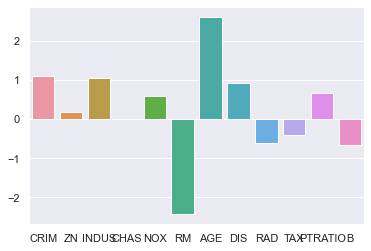

In [54]:
sns.barplot(x=x.columns, y=model.coef_)

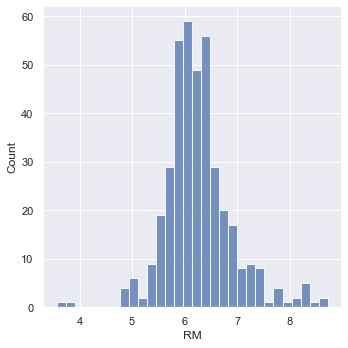

In [55]:
sns.displot(_df['RM']);